# Time sereis Analysis and Forecast - Traffic Dataset

This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.

Link: https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume?resource=download

In [656]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [657]:
# read data
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")


In [658]:
# top data rows
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
5,5181,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
6,5584,NaN,293.17,0.0,0.0,1,Clear,sky is clear,02-10-2012 15:00
7,6015,NaN,293.86,0.0,0.0,1,Clear,sky is clear,02-10-2012 16:00
8,5791,NaN,294.14,0.0,0.0,20,Clouds,few clouds,02-10-2012 17:00
9,4770,NaN,293.10,0.0,0.0,20,Clouds,few clouds,02-10-2012 18:00


In [659]:
# data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [660]:
# Numeric value statistics
df.describe() 

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [661]:
# Converting date time into correct format
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M", errors='coerce')

In [662]:
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00
5,5181,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00
6,5584,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00
7,6015,NaN,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00
8,5791,NaN,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00
9,4770,NaN,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00


In [663]:
df.set_index('date_time', inplace=True)

# Resample to daily mean traffic volume
monthly_df = df['traffic_volume'].resample('MS').mean()
monthly_df = monthly_df.dropna()


## Decomposing series

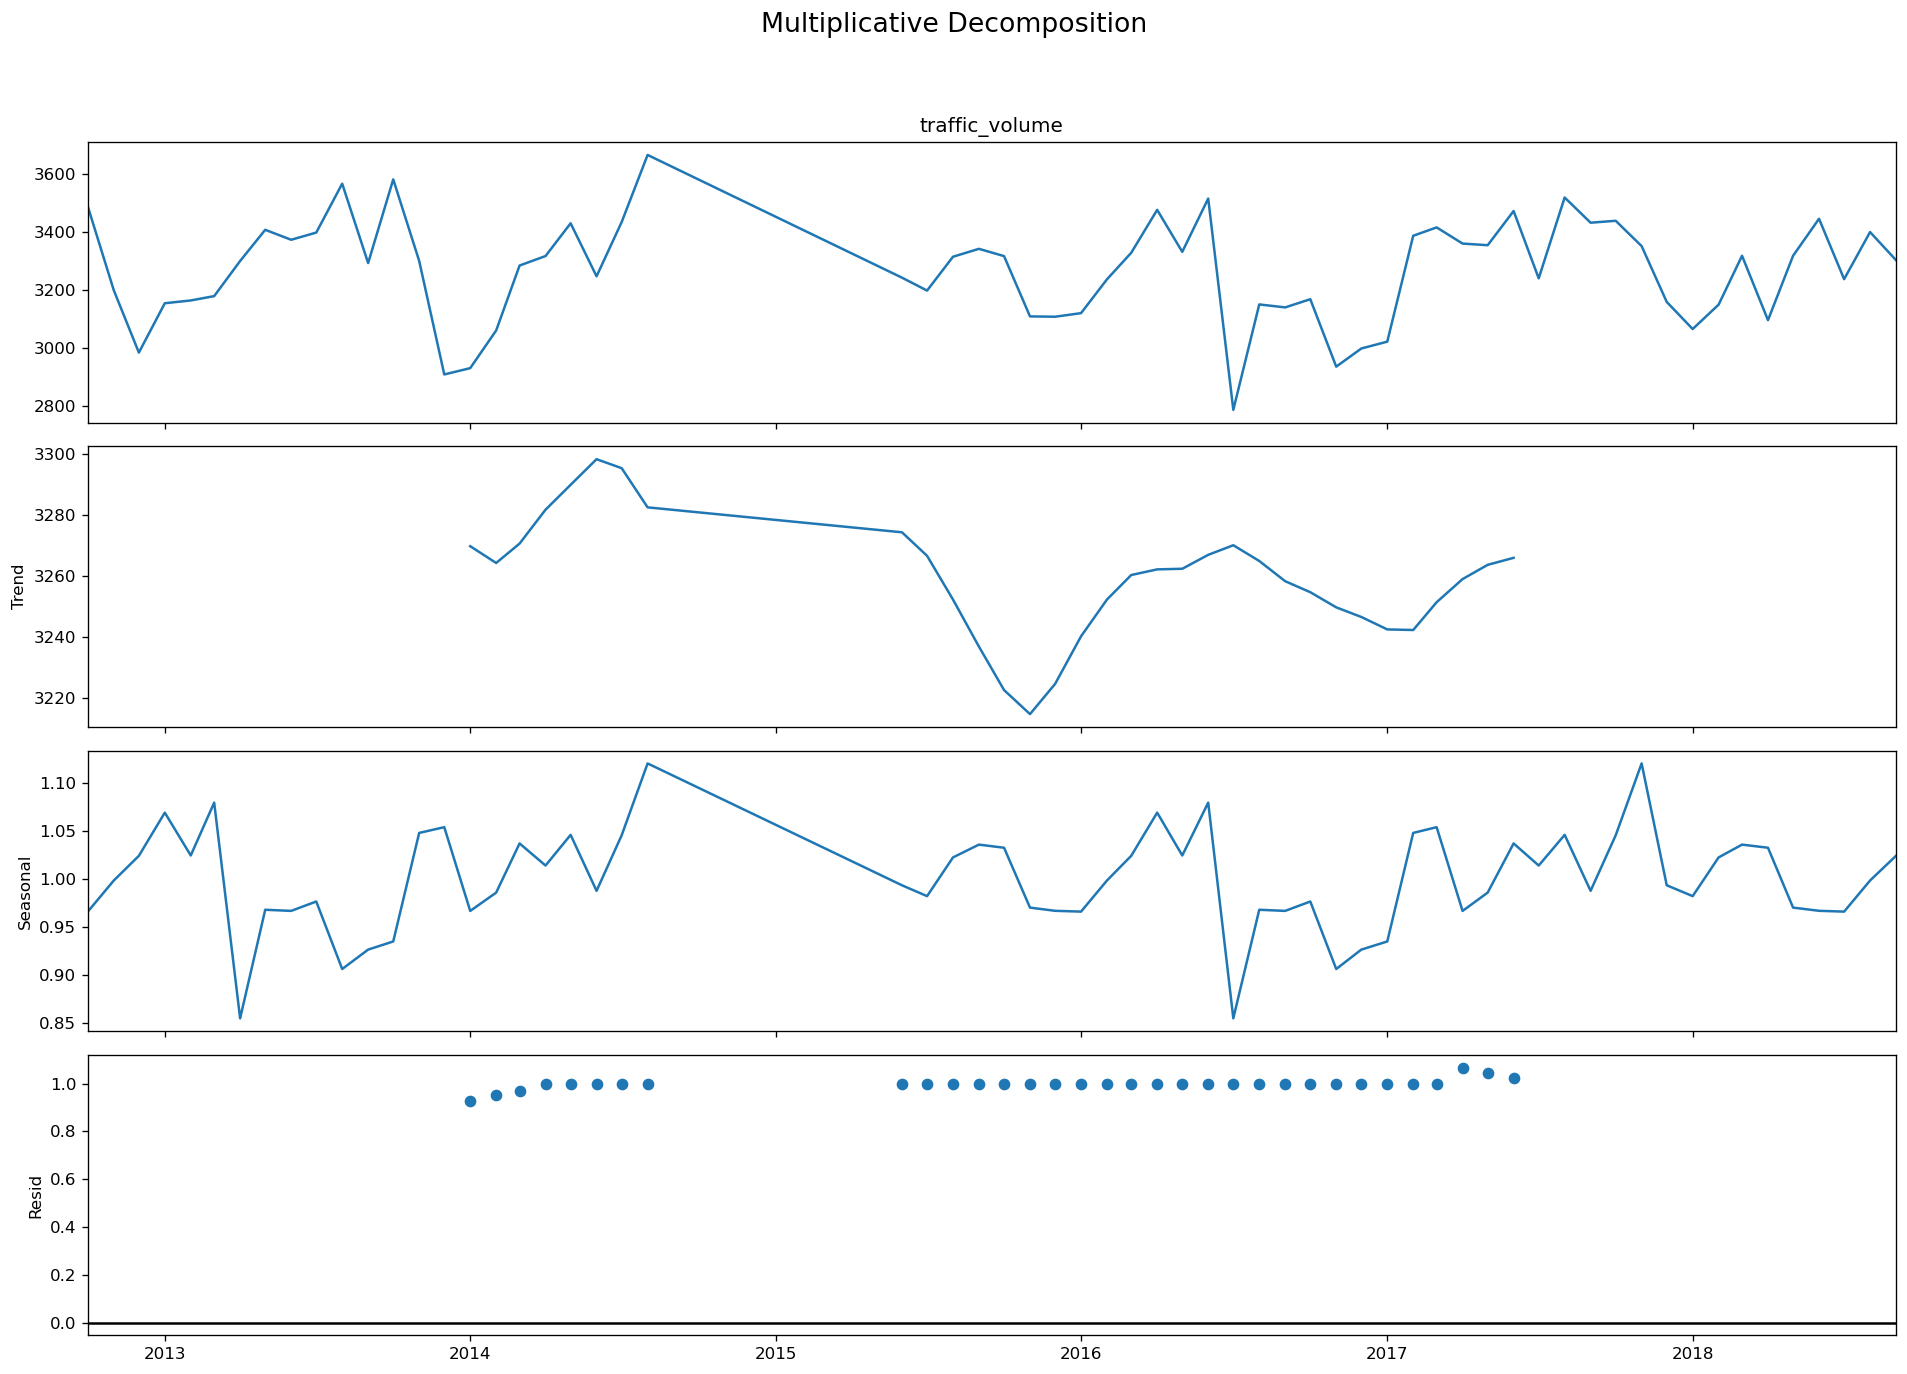

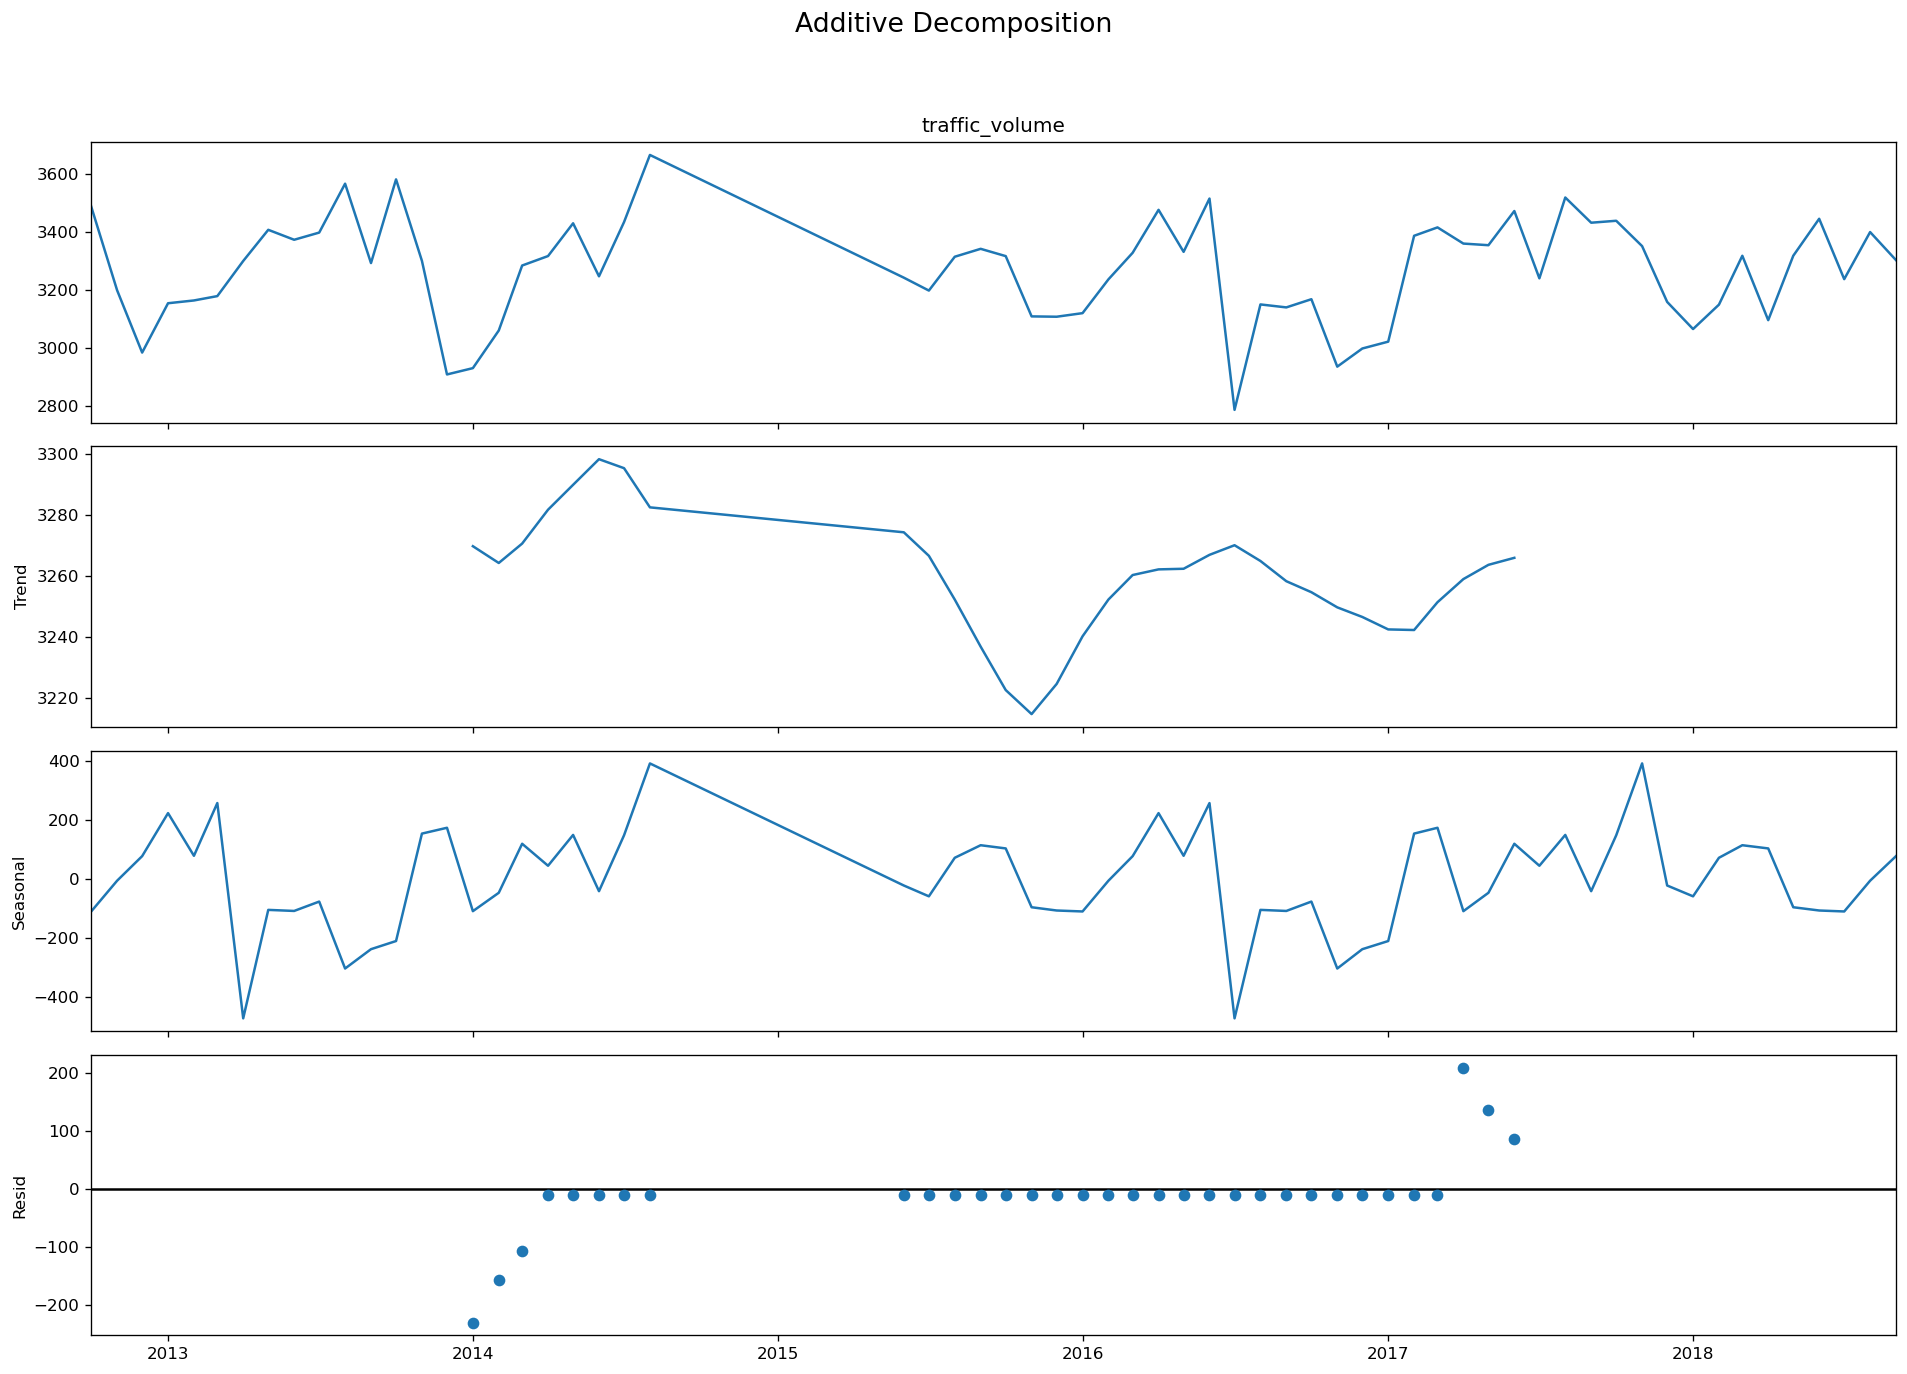

In [665]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(monthly_df, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(monthly_df, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


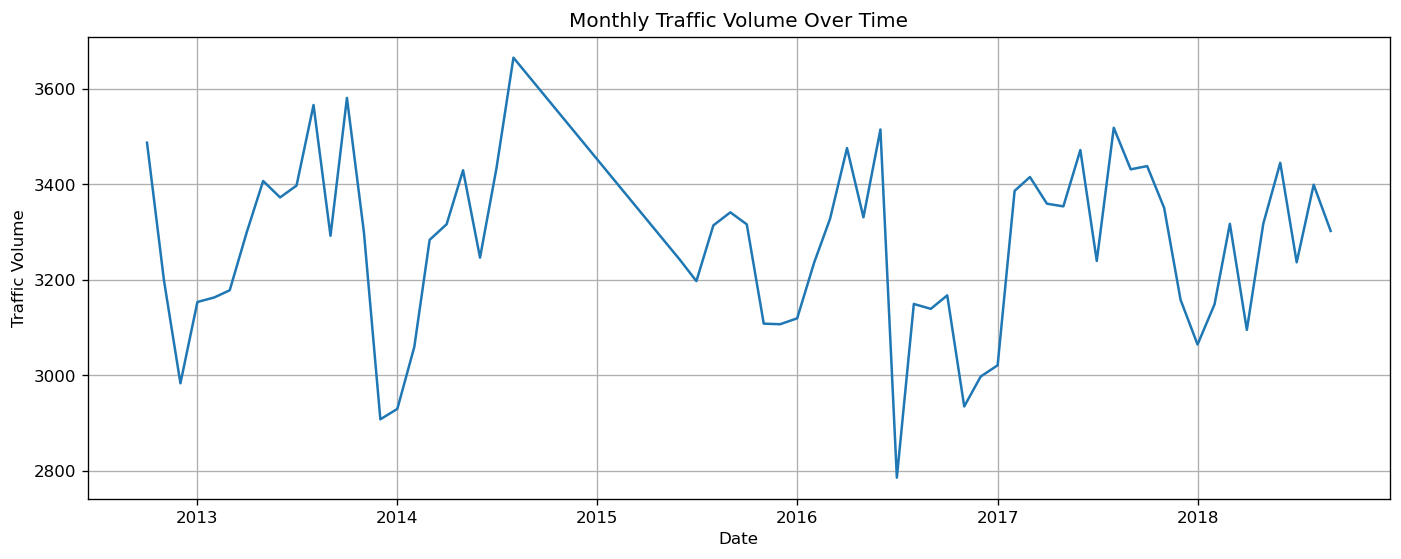

In [666]:
#Plot time series analysis
plt.figure(figsize=(14, 5))
plt.plot(monthly_df, label='Monthly Traffic Volume')
plt.title("Monthly Traffic Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")

plt.grid(True)
plt.show()


## Check Stationarity Using Augmented Dickey-Fuller (ADF) Test

In [668]:
result = adfuller(monthly_df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.293413026772775
p-value: 5.650330314039208e-06


Time series is stationary as the p-value < 0.05

<Figure size 1440x480 with 0 Axes>

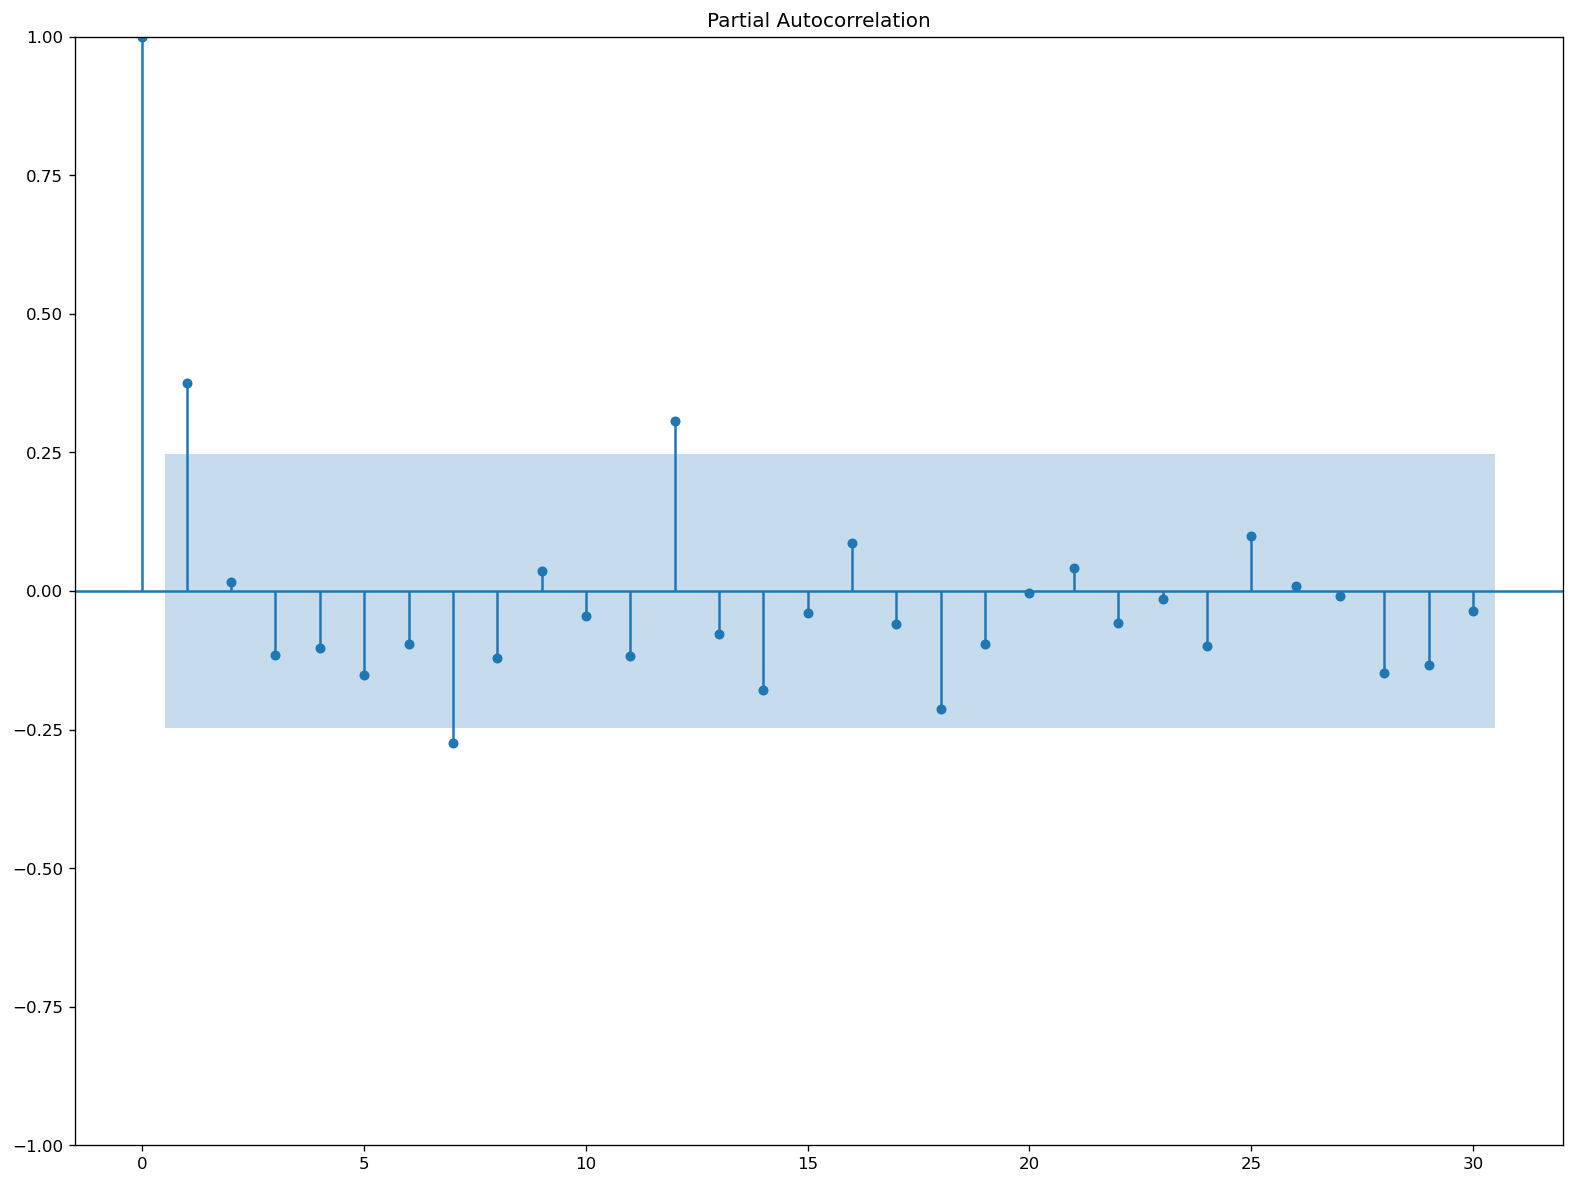

In [670]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_pacf(monthly_df, lags=30)
plt.show()

Taking P=2 accrording to the significance in partial autocorrelation plot.

<Figure size 1440x480 with 0 Axes>

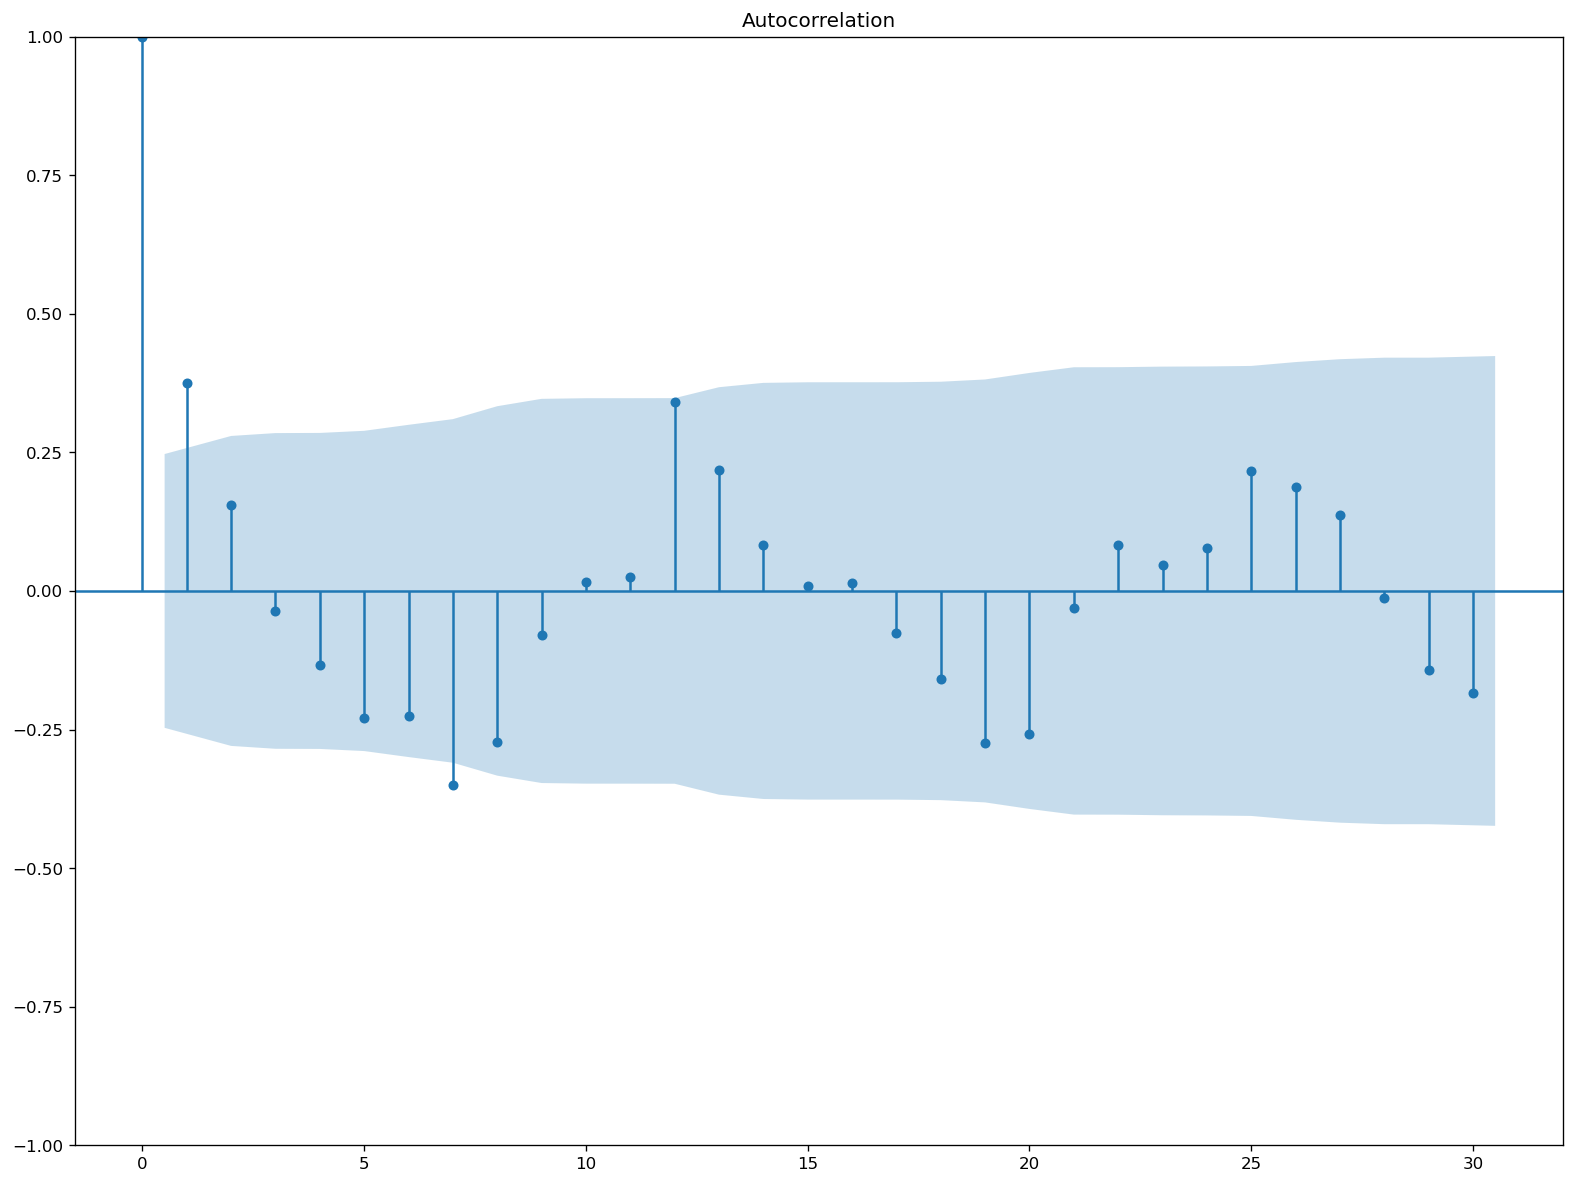

In [672]:


plt.figure(figsize=(12, 4))
plot_acf(monthly_df, lags=30)
plt.show()


Taking q=1 accrording to the significance in autocorrelation plot.

## ARIMA Model

In [675]:
monthly_df.index = pd.to_datetime(monthly_df.index)

In [676]:
from statsmodels.tsa.arima.model import ARIMA
# 2,0,2 ARIMA Model
model = ARIMA(monthly_df, order=(2, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                   63
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -410.499
Date:                Tue, 24 Jun 2025   AIC                            830.997
Time:                        11:50:37   BIC                            841.713
Sample:                             0   HQIC                           835.212
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3271.4315     38.070     85.931      0.000    3196.815    3346.048
ar.L1         -0.5227      0.324     -1.616      0.106      -1.157       0.111
ar.L2          0.3869      0.146      2.658      0.0

### Plot residual errors

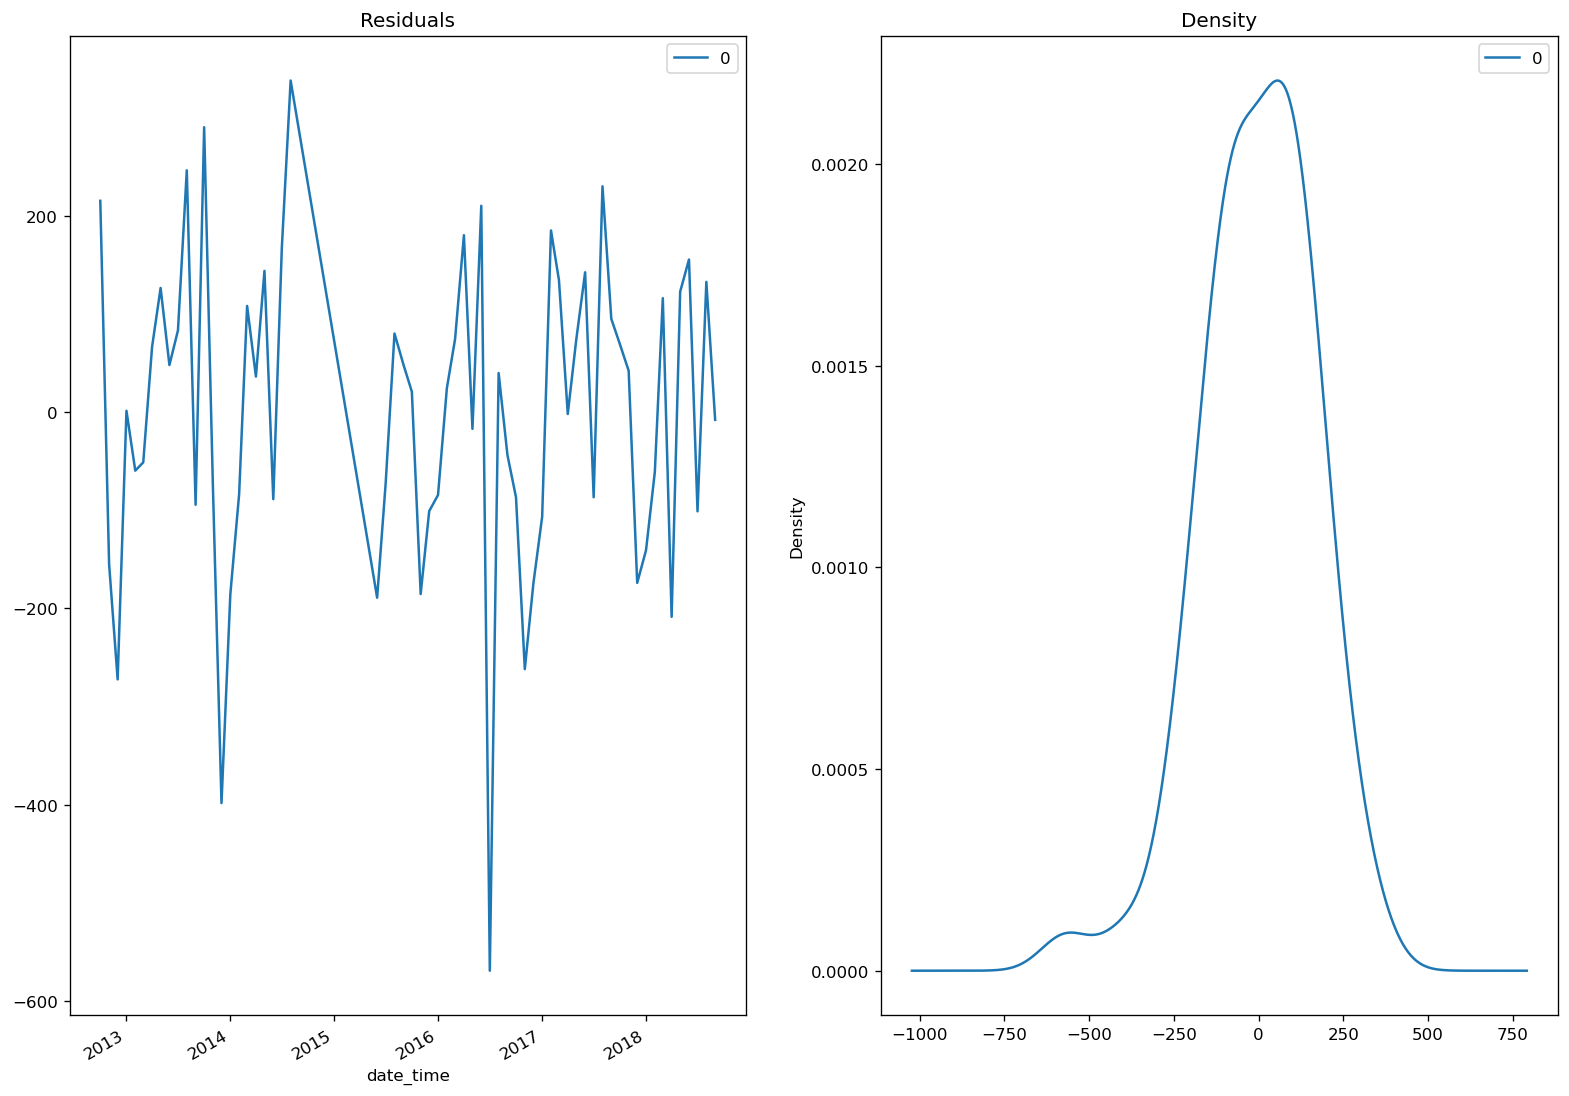

In [678]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

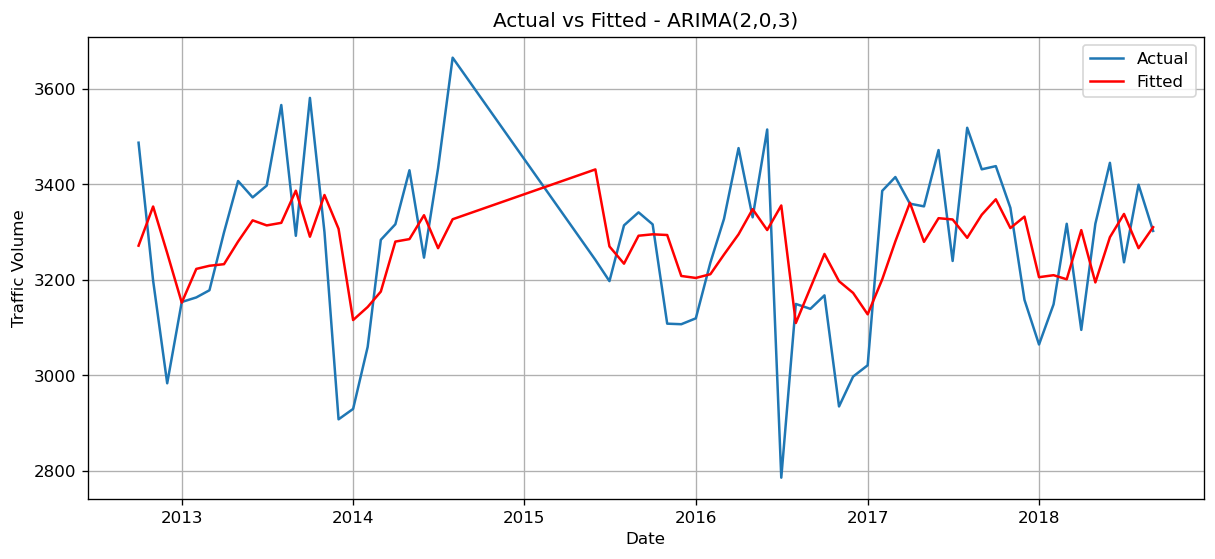

In [680]:
# Get fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted
plt.figure(figsize=(12, 5))
plt.plot(monthly_df, label='Actual')
plt.plot(fitted_values, label='Fitted', color='red')
plt.title('Actual vs Fitted - ARIMA(2,0,3)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


### Optimal ARIMA model using Out-of-Time Cross validation

In [682]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = monthly_df[:-12]
test = monthly_df[-12:]

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                   51
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -334.689
Date:                Tue, 24 Jun 2025   AIC                            679.379
Time:                        11:50:39   BIC                            689.038
Sample:                             0   HQIC                           683.070
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3274.0364     47.706     68.630      0.000    3180.535    3367.538
ar.L1         -0.5091      0.386     -1.319      0.187      -1.265       0.247
ar.L2          0.4217      0.184      2.292      0.0

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


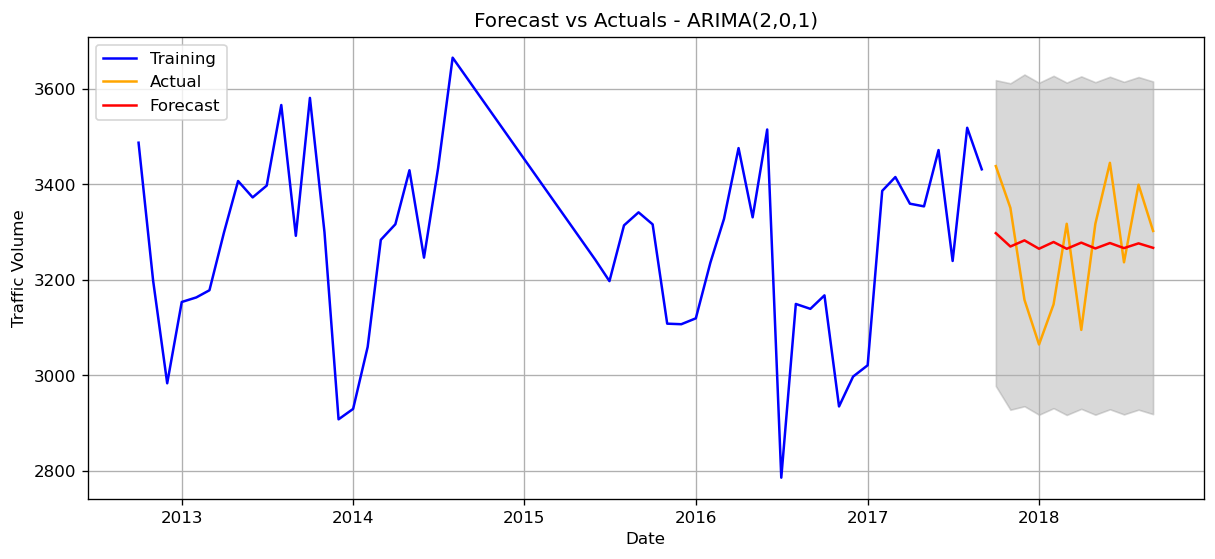

In [683]:

# Build Model
model = ARIMA(train, order=(2,0,1))
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_result = model_fit.get_forecast(steps=12)

# Extract predicted values and confidence intervals
fc_series = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()
lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]

# Ensure forecast index aligns with test
fc_series.index = test.index
lower_series.index = test.index
upper_series.index = test.index

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training', color='blue')
plt.plot(test, label='Actual', color='orange')
plt.plot(fc_series, label='Forecast', color='red')
plt.fill_between(fc_series.index, lower_series, upper_series, color='gray', alpha=0.3)
plt.title('Forecast vs Actuals - ARIMA(2,0,1)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


The AIC has reduced to 679 from 831 which is good. Mostly, the p-values of the X terms are less than < 0.05, which is great. So overall this model is much better.

### Accuracy Metrics for Time Series Forecast

In [686]:

# Accuracy metrics function
def forecast_accuracy(forecast, actual):
    # Convert Series to numpy arrays
    forecast = np.array(forecast)
    actual = np.array(actual)
    
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))           # MAPE
    me = np.mean(forecast - actual)                                      # ME
    mae = np.mean(np.abs(forecast - actual))                             # MAE
    mpe = np.mean((forecast - actual) / actual)                          # MPE
    rmse = np.sqrt(np.mean((forecast - actual)**2))                      # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                            # Correlation

    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                                    # Min-Max error

    acf1 = acf(forecast - actual)[1]                                     # ACF1

    return {
        'MAPE': mape,
        'ME': me,
        'MAE': mae,
        'MPE': mpe,
        'RMSE': rmse,
        'ACF1': acf1,
        'Correlation': corr,
        'MinMax Error': minmax
    }


In [687]:
results = forecast_accuracy(fc_series, test)
for k, v in results.items():
    print(f"{k}: {v:.4f}")

MAPE: 0.0338
ME: 1.3739
MAE: 109.7860
MPE: 0.0019
RMSE: 123.3805
ACF1: 0.1676
Correlation: 0.2313
MinMax Error: 0.0329


### Future forecaste

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


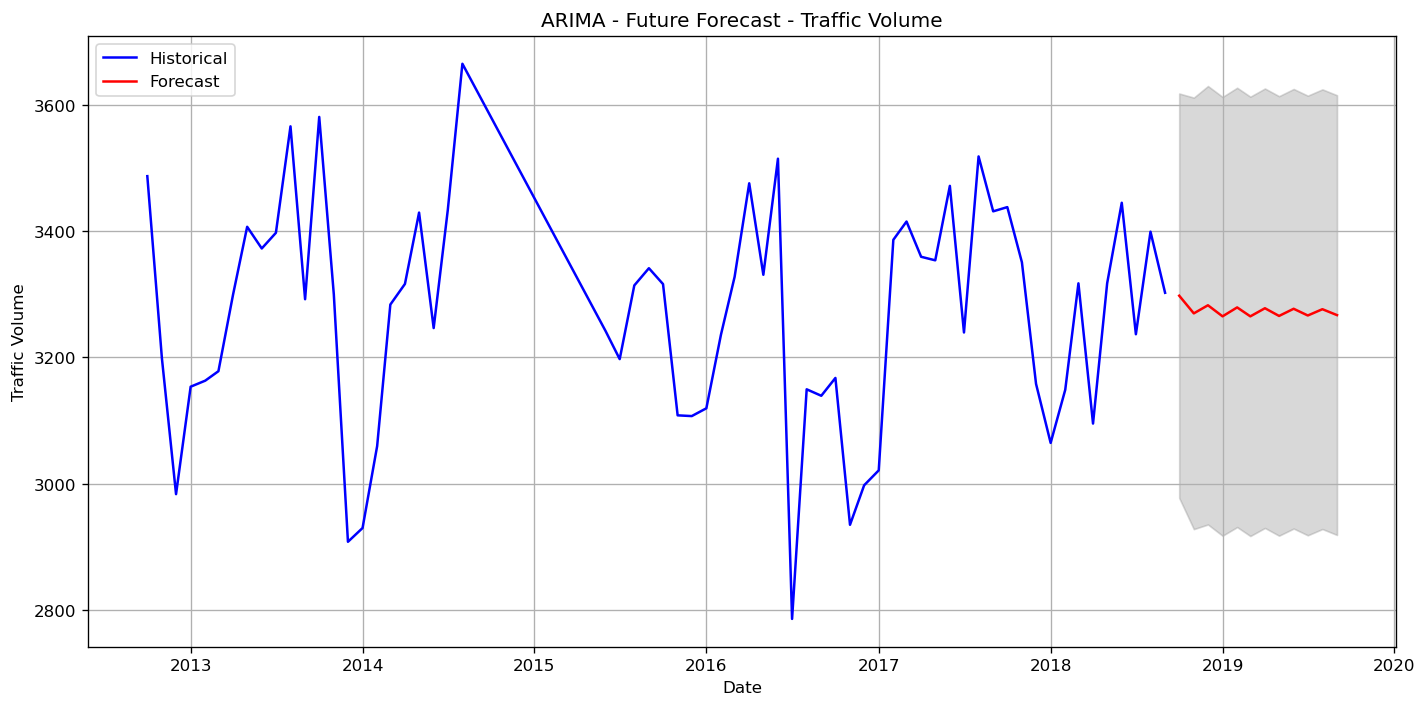

In [689]:
# Forecast next 12 months (or any future steps you want)
n_steps = 12
forecast = model_fit.get_forecast(steps=n_steps)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create future index
last_date = monthly_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_df, label='Historical', color='blue')
plt.plot(future_dates, mean_forecast, label='Forecast', color='red')
plt.fill_between(future_dates, conf_int.iloc[:,0], conf_int.iloc[:,1], color='gray', alpha=0.3)
plt.title('ARIMA - Future Forecast - Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Seasonality check for SARIMA

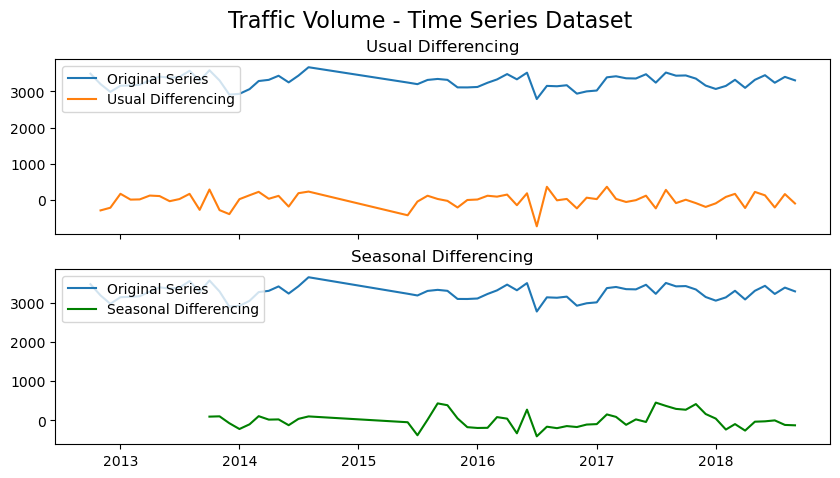

In [691]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(monthly_df[:], label='Original Series')
axes[0].plot(monthly_df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(monthly_df[:], label='Original Series')
axes[1].plot(monthly_df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Traffic Volume - Time Series Dataset', fontsize=16)
plt.show()

We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.
Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

## SARIMA Model

In [694]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [695]:
# Auto SARIMA model
auto_model = pm.auto_arima(monthly_df,start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3,
                           start_P=0, 
                           d=None, D=1,
                           seasonal=True,
                           m=12,               # seasonality period (monthly)
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Summary of the best SARIMA model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=687.025, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=683.507, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=677.573, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=680.124, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=679.365, Time=0.72 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=678.077, Time=0.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=682.832, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=679.561, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit

The model has estimated the AIC and the P values of the coefficients look significant.
The best model SARIMAX(0, 1, 1)x(0, 1, 1, 12) has an AIC of 519.48 and the P Values are significant.
Let’s forecast for the next 24 months.

### Forcaste future values

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


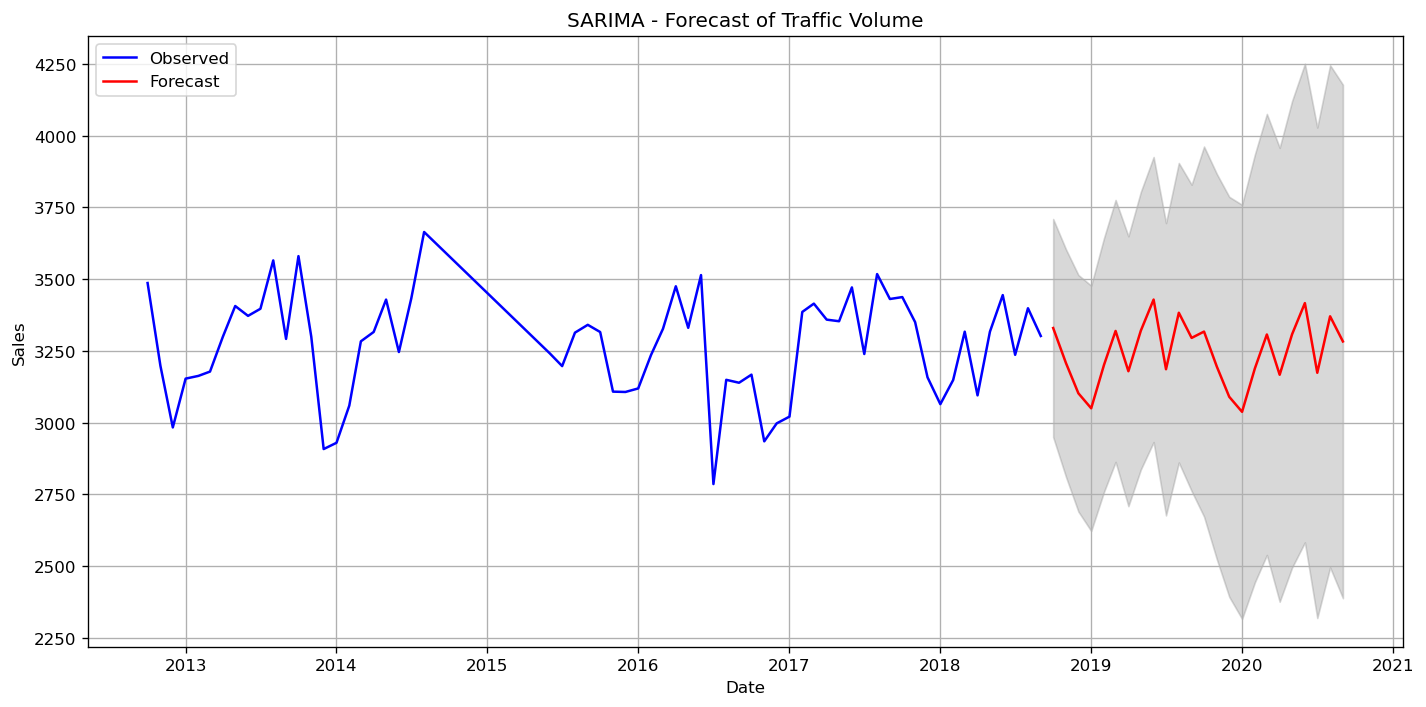

In [698]:
# Forecast next 24 months using pmdarima
n_steps = 24
mean_forecast, conf_int = auto_model.predict(n_periods=n_steps, return_conf_int=True)

# Create future index for plotting
last_date = monthly_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='MS')

# Plotting
plt.figure(figsize=(12,6))
plt.plot(monthly_df, label='Observed', color='blue')
plt.plot(future_dates, mean_forecast, label='Forecast', color='red')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3)
plt.title('SARIMA - Forecast of Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SARIMAX Model

In [700]:
# Fill missing 'holiday' with 'None' to avoid NA in dummies
df['holiday'] = df['holiday'].fillna('None')
df['weather_main'] = df['weather_main'].fillna('Unknown')

In [701]:
# One-hot encode
cat_vars = ['holiday', 'weather_main']
encoded = pd.get_dummies(df[cat_vars], drop_first=True)

In [702]:
# Select numerical exog features
num_vars = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
numeric = df[num_vars]

In [703]:
# Combine numeric + encoded
exog = pd.concat([numeric, encoded], axis=1)

# Resample both y and exog to monthly frequency
exog_monthly = exog.resample('MS').mean()

In [704]:
exog_monthly=exog_monthly.dropna()

In [705]:
# Train/Test Split
train_size = int(len(monthly_df) * 0.85)
train_y, test_y = monthly_df.iloc[:train_size], monthly_df.iloc[train_size:]
train_exog, test_exog = exog_monthly.iloc[:train_size], exog_monthly.iloc[train_size:]


In [706]:
exog_monthly.isnull().sum()

temp                                 0
rain_1h                              0
snow_1h                              0
clouds_all                           0
holiday_Columbus Day                 0
holiday_Independence Day             0
holiday_Labor Day                    0
holiday_Martin Luther King Jr Day    0
holiday_Memorial Day                 0
holiday_New Years Day                0
holiday_None                         0
holiday_State Fair                   0
holiday_Thanksgiving Day             0
holiday_Veterans Day                 0
holiday_Washingtons Birthday         0
weather_main_Clouds                  0
weather_main_Drizzle                 0
weather_main_Fog                     0
weather_main_Haze                    0
weather_main_Mist                    0
weather_main_Rain                    0
weather_main_Smoke                   0
weather_main_Snow                    0
weather_main_Squall                  0
weather_main_Thunderstorm            0
dtype: int64

In [707]:
# Fit Auto ARIMA with Exogenous Variables
model = pm.auto_arima(train_y,
                   exogenous=train_exog,
                   seasonal=True,
                   m=12,  # Monthly seasonality
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                   max_order=None,
                   max_p=3, max_q=3,
                   max_P=2, max_Q=2)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=704.457, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=708.436, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=699.996, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=699.055, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1010.465, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=703.195, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=701.055, Time=0.21 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=701.055, Time=0.48 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=705.293, Time=0.05 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=703.055, Time=0.51 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=705.261, Time=0.16 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=698.315, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=703.228, Time=0.08 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=700.243, Time=0.47 sec
 ARIMA(1,0,1)(0,0,2)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   53
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -344.185
Date:                              Tue, 24 Jun 2025   AIC                            696.370
Time:                                      11:50:55   BIC                            704.251
Sample:                                           0   HQIC                           699.400
                                               - 53                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1966.1702    503.570      3.904      0.000     979.191    2953.149
ar.L1          0.4019      0.152      2.640      0.008       0.104       0.700
ma.S.L12       0.3938      0.214      1.843      0.065      -0.025       0.813
sigma2      2.456e+04   6532.207      3.759      0.000    1.18e+04    3.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.80
Prob(Q):                              0.89   Prob(JB):                         0.09
Heteroskedasticity (H):               1.58   Skew:                            -0.64
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant.
The best model SARIMAX(1, 0, 0)x(0, 0, [1], 12)	 has an AIC of 696.3 and the P Values are significant.


In [709]:
# Fit SARIMAX with best parameters
sarimax_model = SARIMAX(train_y,
                        exog=train_exog,
                        order=model.order,
                        seasonal_order=model.seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
results = sarimax_model.fit()


C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [710]:
# Forecast
forecast = results.get_forecast(steps=len(test_y), exog=test_exog)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


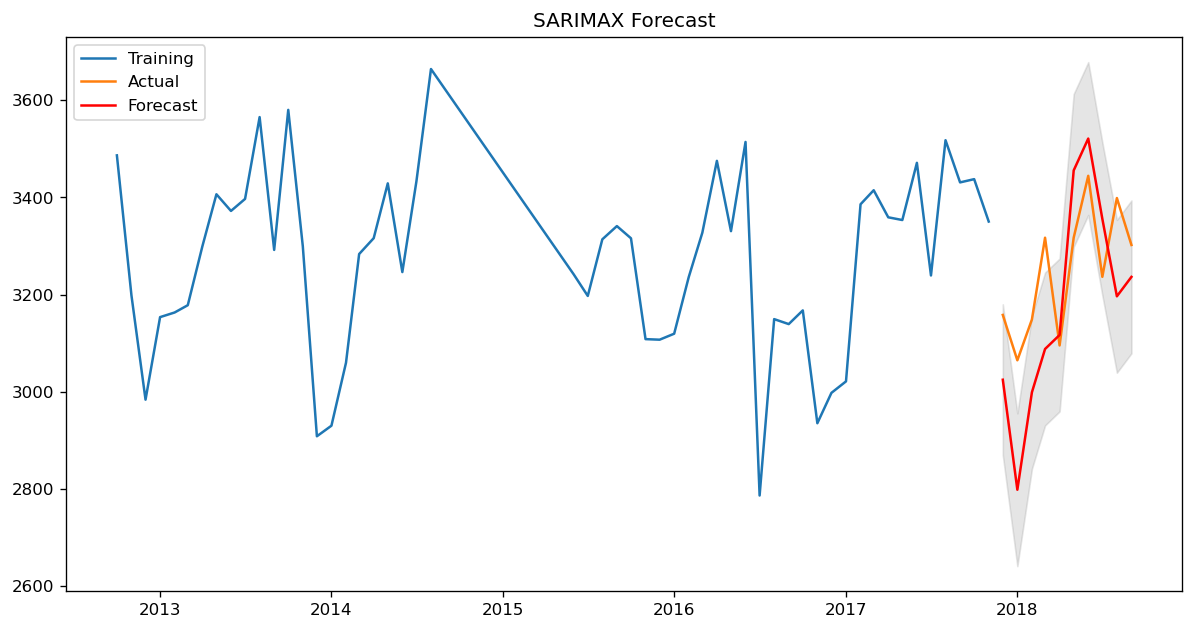

In [711]:
# Fix forecast index
forecast_mean.index = test_y.index
conf_int.index = test_y.index

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Training')
plt.plot(test_y, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='gray', alpha=0.2)
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

## Fianl Model 

The SARIMA(0,1,1)(0,1,1,12) model was selected as the best-performing forecasting model due to its lowest AIC value, strong seasonal fit, and well-behaved residuals. It accurately captured the underlying patterns in the data without requiring external predictors, making it both effective and practical for deployment.